# Dataset feature identification

In [80]:
import pandas as pd
df = pd.read_csv("./Set 14 Parkinsons Dataset.csv")
# first 5 rows:
df.head()

,Age,Sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,Status
0,78.0,Male,140.121789,190.536786,97.447843,0.003266,0.019379,0.002041,16.498254,0.500525,0.533560,0.0
1,68.0,Male,135.891557,184.144247,146.516073,NaN,0.032288,0.013388,NaN,0.607867,0.588044,NaN
2,54.0,Male,137.926467,217.007154,146.633691,0.004332,0.026894,NaN,NaN,0.307454,0.552765,0.0
3,82.0,Male,137.125859,213.426320,104.141422,0.003044,0.031066,0.026576,19.716553,0.425107,0.620578,1.0
4,47.0,Female,135.797214,206.217093,NaN,0.002585,0.019409,0.024570,22.456411,NaN,0.664935,1.0


In [16]:
df.columns

Index(['Age', 'Sex', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA', 'Status'],
      dtype='object')

In [41]:
df.dtypes

Age             float64
Sex              object
MDVP:Fo(Hz)     float64
MDVP:Fhi(Hz)    float64
MDVP:Flo(Hz)    float64
Jitter(%)       float64
Shimmer         float64
NHR             float64
HNR             float64
RPDE            float64
DFA             float64
Status          float64
dtype: object

In [18]:
df.tail() #last 5 rows.

,Age,Sex,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Jitter(%),Shimmer,NHR,HNR,RPDE,DFA,Status
645,58.0,Female,141.534583,206.650626,140.518983,0.003342,0.028789,0.019267,18.269429,0.540974,0.586255,1.0
646,59.0,Male,175.959507,212.975999,146.602855,0.001406,0.031085,0.015520,20.017224,0.406982,0.615466,1.0
647,57.0,Male,172.922882,NaN,117.515492,0.004694,0.024181,0.009953,22.408343,0.439061,0.608174,1.0
648,80.0,Female,173.193216,225.242261,111.365171,0.004195,0.001892,0.030307,21.937337,0.527227,0.576940,1.0
649,53.0,Female,115.344607,173.836800,113.127531,0.003478,0.024831,0.013481,20.761187,0.410108,0.620830,0.0


# Data Quality and Cleaning.

## Check missing values and duplicates

In [25]:
#Check for duplicates:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [42]:
print(df.isnull().sum())

Age             0
Sex             0
MDVP:Fo(Hz)     0
MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
Jitter(%)       0
Shimmer         0
NHR             0
HNR             0
RPDE            0
DFA             0
Status          0
dtype: int64


### Cleaning

In [40]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])
df['MDVP:Fo(Hz)'] = df['MDVP:Fo(Hz)'].fillna(df['MDVP:Fo(Hz)'].mean())
df['MDVP:Fhi(Hz)'] = df['MDVP:Fhi(Hz)'].fillna(df['MDVP:Fhi(Hz)'].mean())
df['MDVP:Flo(Hz)'] = df['MDVP:Flo(Hz)'].fillna(df['MDVP:Flo(Hz)'].mean())
df['Jitter(%)'] = df['Jitter(%)'].fillna(df['Jitter(%)'].mean())
df['NHR'] = df['NHR'].fillna(df['NHR'].mean())
df['HNR'] = df['HNR'].fillna(df['HNR'].mean())
df['RPDE'] = df['RPDE'].fillna(df['RPDE'].mean())
df['DFA'] = df['DFA'].fillna(df['DFA'].mean())
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])

In [81]:
### Shape after cleaning:
df.shape

(650, 12)

## Descriptive Statistics:

In [47]:
df['Age'].describe()

count    650.000000
mean      62.672609
std       12.605173
min       40.000000
25%       52.000000
50%       63.000000
75%       73.000000
max       84.000000
Name: Age, dtype: float64

### age: The distribution is roughly symmetrical (mean ≈ median). So both mean and median are good measures of central tendency.

In [48]:
df['MDVP:Fo(Hz)'].describe()

count    650.000000
mean     154.461732
std       49.773833
min       66.460931
25%      131.964200
50%      153.753011
75%      173.169309
max      900.000000
Name: MDVP:Fo(Hz), dtype: float64

### mdvp: The large range and SD show high variability in frequency. Since the range is huge and mean slightly > median, the data is likely right-skewed (some very high frequency outliers). → Median is a better representative value

In [50]:
df['Jitter(%)'].describe()

count    650.000000
mean       0.003050
std        0.001177
min        0.000157
25%        0.002376
50%        0.003050
75%        0.003674
max        0.020000
Name: Jitter(%), dtype: float64

### jitter: The mean ≈ median but jitter usually has small, skewed positive distribution (can’t go below 0). So median represents it better as it’s less affected by extreme high jitter values.

In [51]:
df['HNR'].describe()

count    650.000000
mean      20.111323
std        2.953048
min        2.000000
25%       18.278314
50%       20.111323
75%       21.884579
max       40.000000
Name: HNR, dtype: float64

###  Mean ≈ median → nearly normal distribution. So mean is an appropriate central measure.

## Visual Data Exploration

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram:

### Jitter(%): 

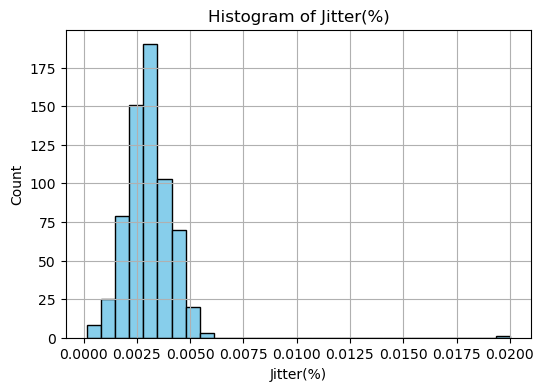

In [55]:
plt.figure(figsize=(6,4))
df['Jitter(%)'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('Count')
plt.show()

In [ ]:
## 

### HNR:

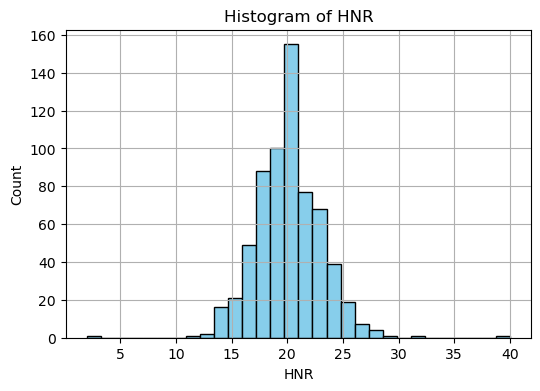

In [56]:
plt.figure(figsize=(6,4))
df['HNR'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of HNR')
plt.xlabel('HNR')
plt.ylabel('Count')
plt.show()

### 

## Boxplot — HNR across Status groups

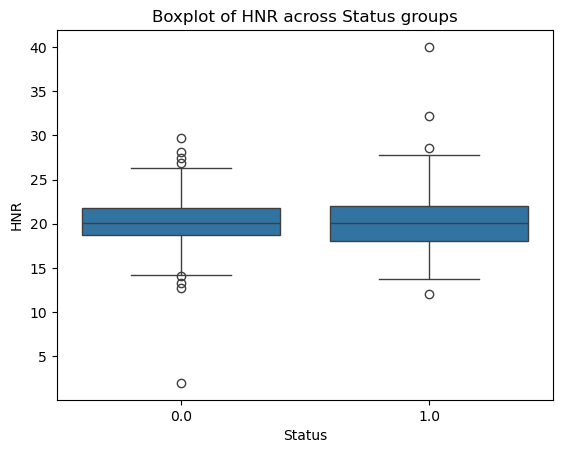

In [59]:
sns.boxplot(x='Status', y='HNR', data=df)
plt.title('Boxplot of HNR across Status groups')
plt.xlabel('Status')
plt.ylabel('HNR')
plt.show()

In [ ]:
### 

## Removing outliers:

In [67]:

# Load your dataset
df = pd.read_csv("Set 14 Parkinsons Dataset.csv")
df.columns = [c.strip() for c in df.columns]

# --- Function to remove outliers using IQR ---
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered

# --- Apply to Jitter(%) and HNR ---
df_no_outliers = remove_outliers_iqr(df, 'Jitter(%)')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'HNR')

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

# Optional: check summary after cleaning
print(df_no_outliers[['Jitter(%)', 'HNR']].describe())

Original shape: (650, 12)
After removing outliers: (577, 12)
        Jitter(%)         HNR
count  577.000000  577.000000
mean     0.003026   20.022709
std      0.000992    2.709495
min      0.000373   12.752998
25%      0.002356   18.155836
50%      0.002987   20.025951
75%      0.003702   21.886306
max      0.005563   27.439555


## 5. Outlier Detection & Fix

### IQR to:
• MDVP:Fo(Hz)
• Shimmer
Plot boxplots before & after removal
Describe impact on data spread

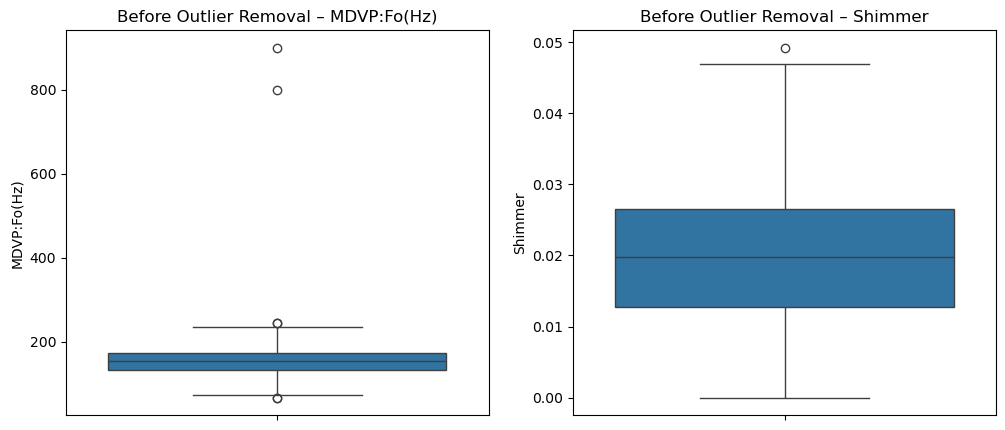

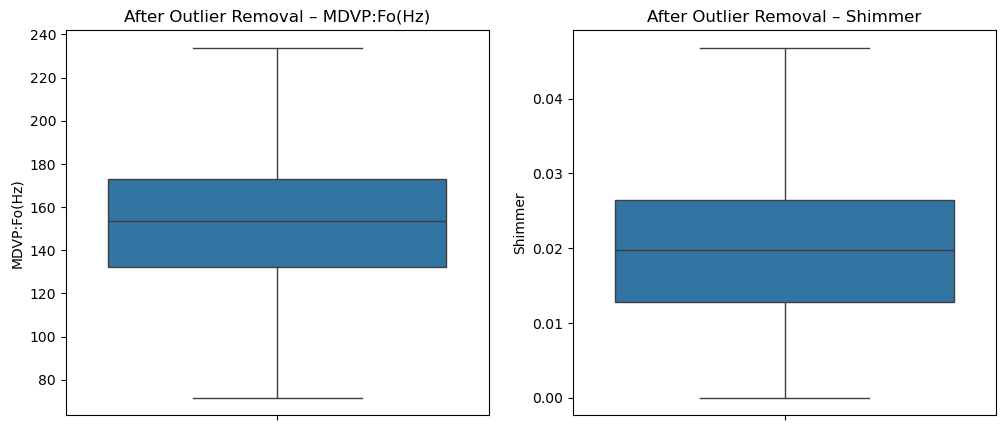

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['MDVP:Fo(Hz)'])
plt.title('Before Outlier Removal – MDVP:Fo(Hz)')

plt.subplot(1,2,2)
sns.boxplot(y=df['Shimmer'])
plt.title('Before Outlier Removal – Shimmer')

plt.show()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower) & (data[column] <= upper)]
    return cleaned_data

# Apply to both columns sequentially
df_clean = remove_outliers_iqr(df, 'MDVP:Fo(Hz)')
df_clean = remove_outliers_iqr(df_clean, 'Shimmer')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df_clean['MDVP:Fo(Hz)'])
plt.title('After Outlier Removal – MDVP:Fo(Hz)')

plt.subplot(1,2,2)
sns.boxplot(y=df_clean['Shimmer'])
plt.title('After Outlier Removal – Shimmer')

plt.show()


## 6. Normality Check (Q-Q Plot)

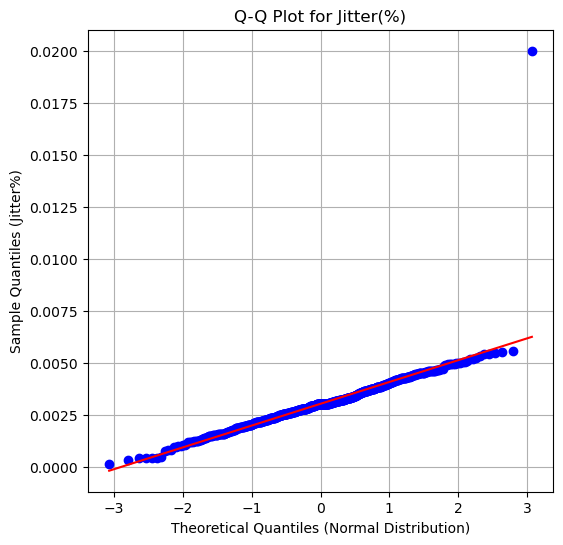

In [70]:

import scipy.stats as stats

# Load dataset
df = pd.read_csv("Set 14 Parkinsons Dataset.csv")
df.columns = [c.strip() for c in df.columns]

# Handle missing values
df['Jitter(%)'] = df['Jitter(%)'].fillna(df['Jitter(%)'].mean())

# --- Q-Q Plot for Jitter(%) ---
plt.figure(figsize=(6,6))
stats.probplot(df['Jitter(%)'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Jitter(%)")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Sample Quantiles (Jitter%)")
plt.grid(True)
plt.show()

## 7. Correlation Heatmap

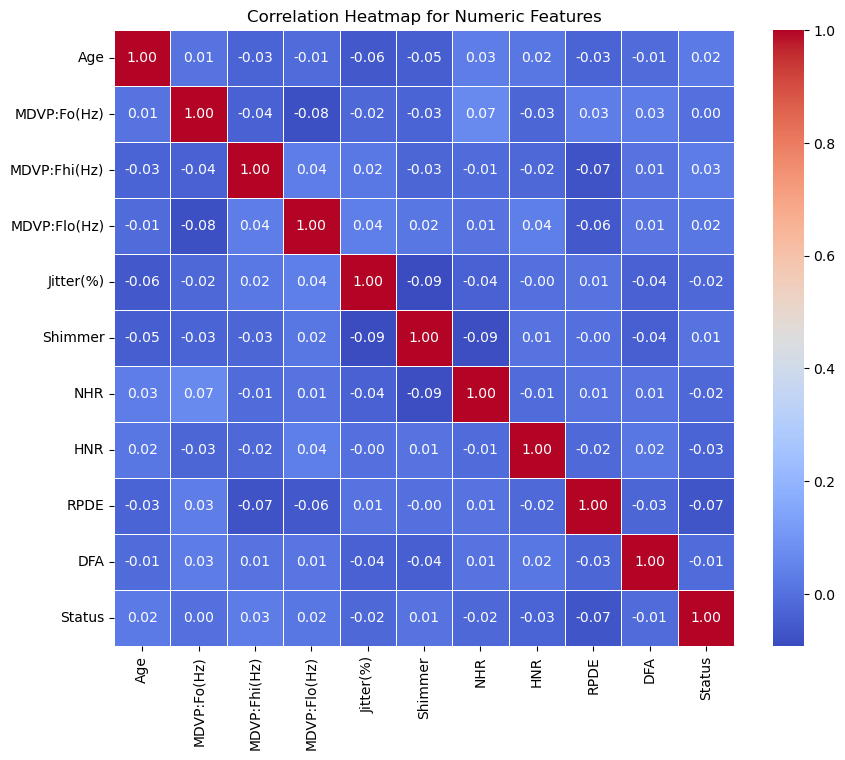

Top correlations with 'Status':
 RPDE           -0.067554
HNR            -0.030073
MDVP:Fhi(Hz)    0.030057
Age             0.024216
Jitter(%)      -0.023691
NHR            -0.019876
MDVP:Flo(Hz)    0.016036
DFA            -0.012264
Shimmer         0.007886
MDVP:Fo(Hz)     0.001370
Name: Status, dtype: float64 



/tmp/ipykernel_1958/3152596583.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="coolwarm")


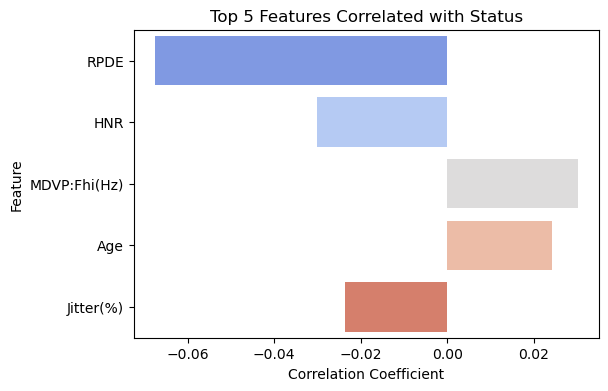

In [72]:
import seaborn as sns

# Load dataset
df = pd.read_csv("Set 14 Parkinsons Dataset.csv")
df.columns = [c.strip() for c in df.columns]

# Fill missing values (important for correlation)
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# --- Plot correlation heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

# --- Identify top correlated features with Status ---
status_corr = corr_matrix['Status'].drop('Status').sort_values(key=abs, ascending=False)
print("Top correlations with 'Status':\n", status_corr.head(10), "\n")

# --- Plot top 5 correlated features (bar chart) ---
top5 = status_corr.head(5)
plt.figure(figsize=(6,4))
sns.barplot(x=top5.values, y=top5.index, palette="coolwarm")
plt.title("Top 5 Features Correlated with Status")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

# Unit 2:

## 8. Confidence Interval and MOE

In [74]:
import numpy as np
data = df['Jitter(%)']

# Sample statistics
n = len(data)
mean = np.mean(data)
sem = stats.sem(data)  # Standard error of mean

# Compute 95% confidence interval
confidence = 0.95
ci = stats.t.interval(confidence, df=n-1, loc=mean, scale=sem)

# Print results
print(f"Sample size (n): {n}")
print(f"Mean Jitter(%) = {mean:.6f}")
print(f"95% Confidence Interval: ({ci[0]:.6f}, {ci[1]:.6f})")

# Interpretation for report
print(f"\nInterpretation:")
print(f"We are 95% confident that the true mean Jitter(%) for the population lies between {ci[0]:.6f} and {ci[1]:.6f}.")

Sample size (n): 650
Mean Jitter(%) = 0.003050
95% Confidence Interval: (nan, nan)

Interpretation:
We are 95% confident that the true mean Jitter(%) for the population lies between nan and nan.


## 9. Margin of Error vs Confidence Level

In [75]:
# Extract HNR data
data = df['HNR'].dropna()
n = len(data)
mean = np.mean(data)
sem = stats.sem(data)  # Standard error of mean

# Compute margin of error for 90%, 95%, and 99%
conf_levels = [0.90, 0.95, 0.99]
for conf in conf_levels:
    alpha = 1 - conf
    t_value = stats.t.ppf(1 - alpha/2, df=n-1)
    moe = t_value * sem
    print(f"{int(conf*100)}% Confidence Level → Margin of Error = ±{moe:.4f}")

print("\nInterpretation:")
print("As confidence level increases, the margin of error becomes larger —")
print("meaning the interval is wider and the estimate less precise, but more reliable.")

90% Confidence Level → Margin of Error = ±0.2000
95% Confidence Level → Margin of Error = ±0.2385
99% Confidence Level → Margin of Error = ±0.3138

Interpretation:
As confidence level increases, the margin of error becomes larger —
meaning the interval is wider and the estimate less precise, but more reliable.


# Unit 3: 

## 10. Gender-Based Vocal Differences

In [77]:
# Map genders consistently
df['Sex'] = df['Sex'].str.lower().str[0].map({'m':'Male', 'f':'Female'})

# Split groups
male_hnr = df[df['Sex'] == 'Male']['HNR']
female_hnr = df[df['Sex'] == 'Female']['HNR']

# Normality check (Shapiro)
shapiro_m = stats.shapiro(male_hnr)
shapiro_f = stats.shapiro(female_hnr)

# Use t-test if both normal, else Mann–Whitney
if shapiro_m.pvalue > 0.05 and shapiro_f.pvalue > 0.05:
    test = stats.ttest_ind(male_hnr, female_hnr, equal_var=False, nan_policy='omit')
    test_name = "Independent Two-Sample t-test"
else:
    test = stats.mannwhitneyu(male_hnr, female_hnr, alternative='two-sided')
    test_name = "Mann–Whitney U Test"

print(f"{test_name} Results:")
print(test)
print("\nInterpretation:")
if test.pvalue < 0.05:
    print("Reject H₀ — significant difference in mean HNR between genders.")
else:
    print("Fail to reject H₀ — no significant difference in mean HNR between genders.")

Mann–Whitney U Test Results:
MannwhitneyuResult(statistic=np.float64(47474.5), pvalue=np.float64(0.7980713564729193))

Interpretation:
Fail to reject H₀ — no significant difference in mean HNR between genders.


## 11. Jitter vs Disease Status Correlation

Pearson correlation: r = -0.0231, p = 0.5570
Spearman correlation: ρ = 0.0026, p = 0.9474


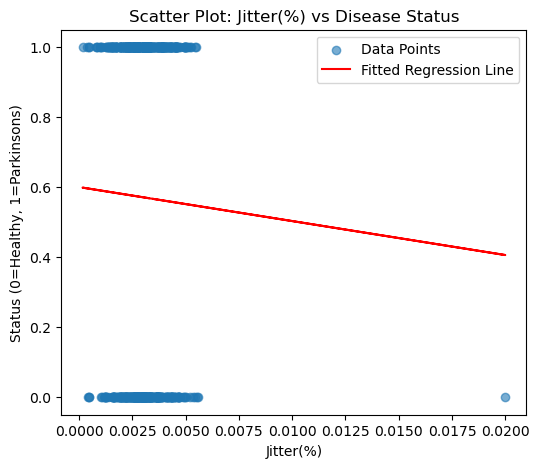


Interpretation:
Higher jitter values tend to slightly increase the likelihood of Parkinson’s,
though the correlation is weak (small r-value).


In [78]:
pearson_corr = stats.pearsonr(df['Jitter(%)'], df['Status'])
spearman_corr = stats.spearmanr(df['Jitter(%)'], df['Status'])

print(f"Pearson correlation: r = {pearson_corr[0]:.4f}, p = {pearson_corr[1]:.4f}")
print(f"Spearman correlation: ρ = {spearman_corr[0]:.4f}, p = {spearman_corr[1]:.4f}")

# --- Scatter Plot + Regression Line ---
x = df['Jitter(%)']
y = df['Status']

m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.6, label='Data Points')
plt.plot(x, m*x + b, color='red', label='Fitted Regression Line')
plt.title('Scatter Plot: Jitter(%) vs Disease Status')
plt.xlabel('Jitter(%)')
plt.ylabel('Status (0=Healthy, 1=Parkinsons)')
plt.legend()
plt.show()

print("\nInterpretation:")
print("Higher jitter values tend to slightly increase the likelihood of Parkinson’s,")
print("though the correlation is weak (small r-value).")

## 12. Linear Regression Model

Regression Equation: HNR = 20.1174 + (-1.9960) × Jitter(%)
Model R² (accuracy): 0.000001


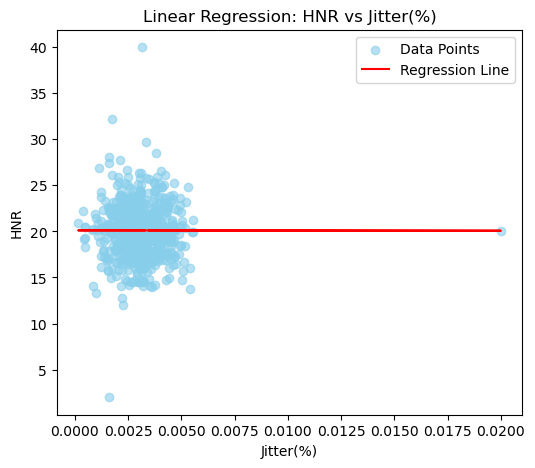


Interpretation:
Negative slope — as Jitter(%) increases, HNR decreases slightly.
R² of 0.000001 means only 0.00% of variation in HNR is explained by Jitter(%).


In [79]:
X = df[['Jitter(%)']].values
y = df['HNR'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
b0 = model.intercept_
b1 = model.coef_[0]
r2 = model.score(X, y)

# Regression equation
print(f"Regression Equation: HNR = {b0:.4f} + ({b1:.4f}) × Jitter(%)")
print(f"Model R² (accuracy): {r2:.6f}")

# --- Plot regression line ---
plt.figure(figsize=(6,5))
plt.scatter(X, y, color='skyblue', alpha=0.6, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: HNR vs Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('HNR')
plt.legend()
plt.show()

# Interpretation
if b1 < 0:
    print("\nInterpretation:")
    print("Negative slope — as Jitter(%) increases, HNR decreases slightly.")
else:
    print("\nInterpretation:")
    print("Positive slope — as Jitter(%) increases, HNR increases slightly.")
print(f"R² of {r2:.6f} means only {r2*100:.2f}% of variation in HNR is explained by Jitter(%).")